In [2]:
import tensorflow as tf 


In [3]:
x1=tf.constant(1,name='constant 1')
x2=tf.constant(2)
x3=tf.add(x1,x2)
x3.numpy()

3

In [4]:
v1=tf.constant([1,2,3,4])
v2=tf.constant([5,6,7,8])
v=v1+v2
v

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 6,  8, 10, 12])>

In [5]:
v.numpy()

array([ 6,  8, 10, 12])

## Linear Regression 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
data=pd.read_csv(r'C:\Users\AMIT\Downloads\FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
X_d=data.loc[:,'ENGINESIZE'].values
y_d=data.loc[:,'CO2EMISSIONS'].values


## Y=wx+b

In [32]:
X=tf.constant(X_d,dtype='float32')
y=tf.constant(y_d,dtype='float32')

w=tf.Variable(2.0,dtype='float32')
b=tf.Variable(7.2,dtype='float32')

In [33]:
# define H
def H(X):
    Y_P=w*X+b
    return Y_P

In [34]:
#cost function
def cost_function(y_actual,y_pred):
    mse=tf.reduce_mean(tf.square(y_actual-y_pred))#  1\m sum (y_a-y_pr)^2
    return mse

In [35]:
#train

lr=0.01
epochs=1000
losses_values=[]
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        
        y_pred=H(X)#feed forward
        #back pro
        loss=cost_function(y,y_pred)
        losses_values.append(loss)
        #updates 
        gradients=tape.gradient(loss,[w,b]) #[dl/dw ,dl/db]
        
        #w=w-lr*grad
        w.assign_sub(lr*gradients[0])
        b.assign_sub(lr*gradients[1])

In [36]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=951.58215>

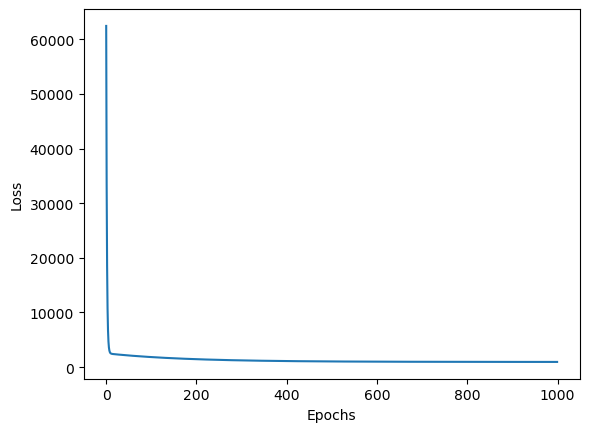

In [37]:
plt.plot(losses_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

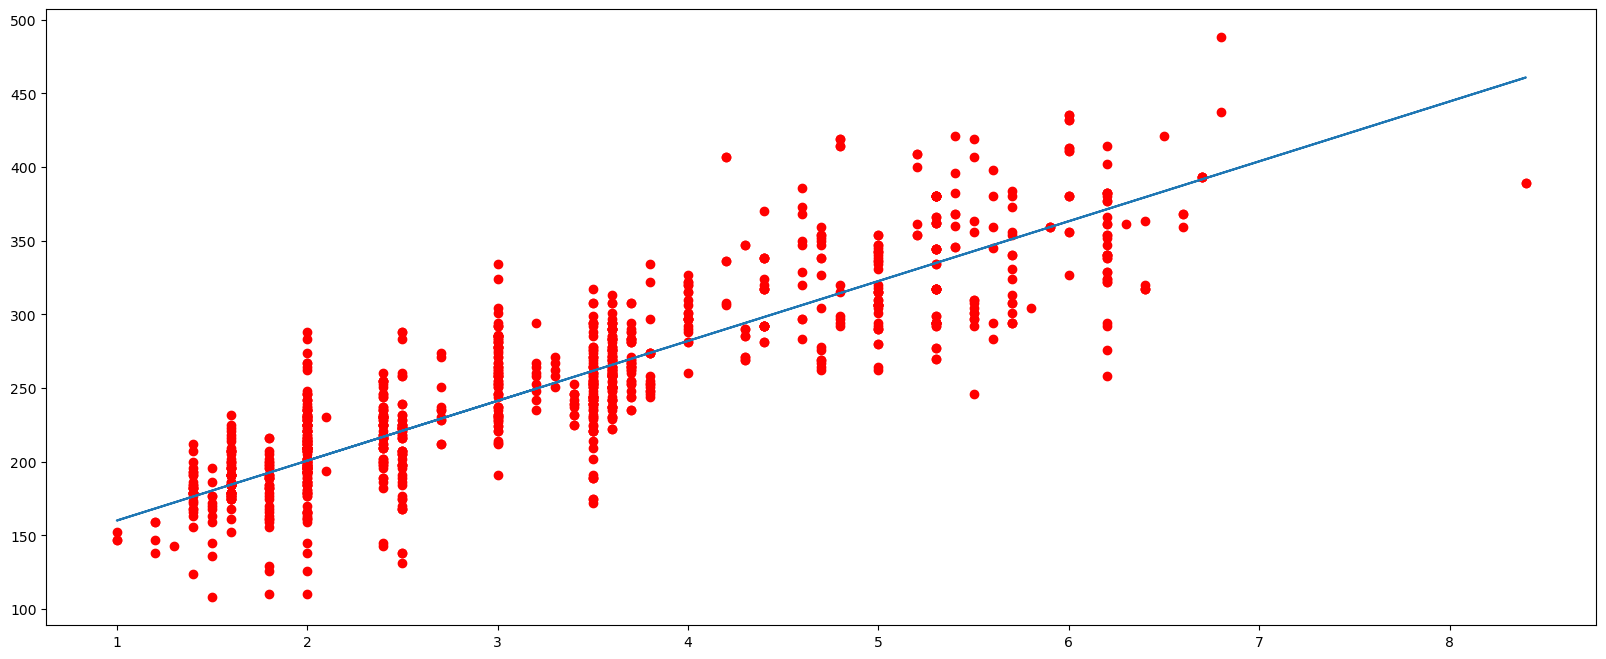

In [38]:
plt.figure(figsize=(20,8))
plt.scatter(X.numpy(),y.numpy(),c='red')
plt.plot(X.numpy(),w*X.numpy()+b)
plt.show()

In [52]:
X=data.iloc[:,[3,4,7]].values
y=data.iloc[:,-1].values

In [53]:
X.shape

(1067, 3)

##  Model 

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model=Sequential()
model.add(Dense(units=3,activation='relu',input_shape=(3,)))
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='mse',optimizer='sgd')

In [58]:
model.fit(X,y,epochs=2,batch_size=32)

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 67451.0234
Epoch 2/2
1/1 [==============================] - 0s 20ms/step - loss: 450920218624.0000


In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [60]:
#model
inp=Input(shape=(3,)) #input layer 
h1=Dense(3,activation='relu')(inp)
h2=Dense(3,activation='relu')(h1)
out=Dense(1)(h2)
model=Model(inputs=inp,outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='mse',optimizer='sgd')
model.fit(X,y,epochs=2,batch_size=128)

Epoch 1/2
9/9 [==============================] - 1s 2ms/step - loss: 60860.6992
Epoch 2/2
9/9 [==============================] - 0s 2ms/step - loss: 43547.9141


In [62]:
tf.__version__

'2.10.0'